In [ ]:
%pip install numpy

In [ ]:
%pip install pandas

In [ ]:
%pip install scikit-learn

In [ ]:
%pip install matplotlib

In [ ]:
%pip install scipy

In [ ]:
%pip install --upgrade scipy

In [24]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import csv

In [32]:
iris_df = datasets.load_iris()
iris_dataframe = pd.DataFrame(iris_df['data'], columns=iris_df.feature_names)
dft = pd.DataFrame(iris_df['target'], columns=["out"])
frames = [iris_dataframe, dft]
result = pd.concat(frames, axis = 1)

In [33]:
print(result)
result.to_csv('iris.csv')
print(dir(iris_df))
print(iris_df.feature_names)
print(iris_df.target)
print(iris_df.target_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     out  
0      0  
1    

<function matplotlib.pyplot.show(close=None, block=None)>

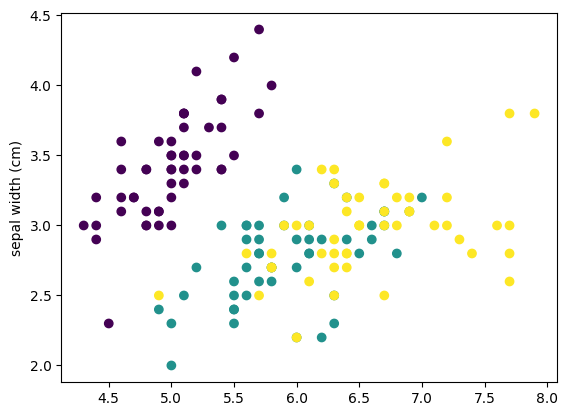

In [34]:
x_axis = iris_df.data[:, 0]
y_axis = iris_df.data[:,1]

plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show

In [37]:
modelK = KMeans(n_clusters=3)
modelK.fit(iris_df.data)
predicted_label = modelK.predict([[7.2, 3.5, 0.8, 1.6]])
all_predictions = modelK.predict(iris_df.data)

In [38]:
print(predicted_label)
print(all_predictions)
print(modelK.fit(iris_df.data))
print(modelK.cluster_centers_)
print(metrics.rand_score(iris_df.target, modelK.labels_))
print(metrics.adjusted_rand_score(iris_df.target, modelK.labels_))
print(metrics.homogeneity_score(iris_df.target, modelK.labels_))

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
KMeans(n_clusters=3)
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
0.8737360178970918
0.7163421126838476
0.7364192881252849


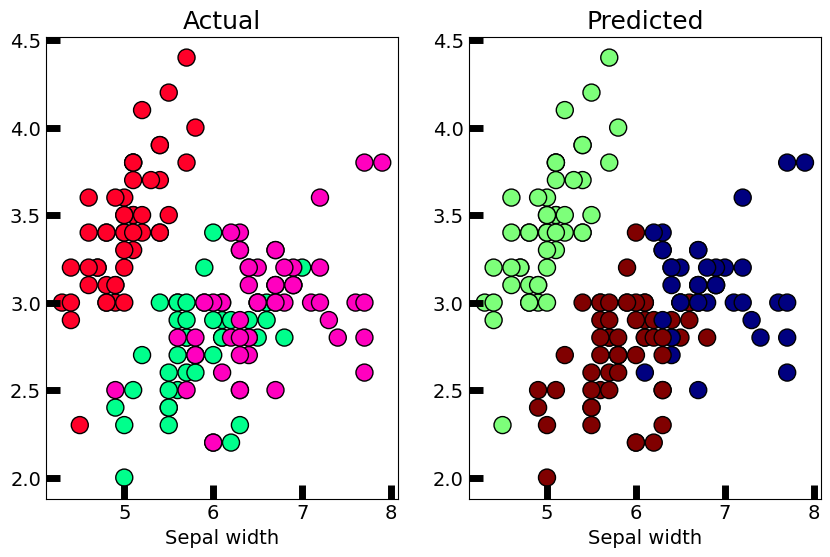

In [40]:
new_labels = modelK.labels_

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].scatter(x_axis, y_axis, c=iris_df.target, cmap='gist_rainbow', edgecolor='k', s = 150)
axes[1].scatter(x_axis, y_axis, c=new_labels, cmap='jet', edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=14)
axes[0].set_xlabel('Sepal width', fontsize=14)
axes[1].set_xlabel('Sepal length', fontsize=14)
axes[1].set_xlabel('Sepal width', fontsize=14)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=14)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=14)

axes[0].set_title('Actual', fontsize = 18)
axes[1].set_title('Predicted', fontsize = 18)
plt.show()

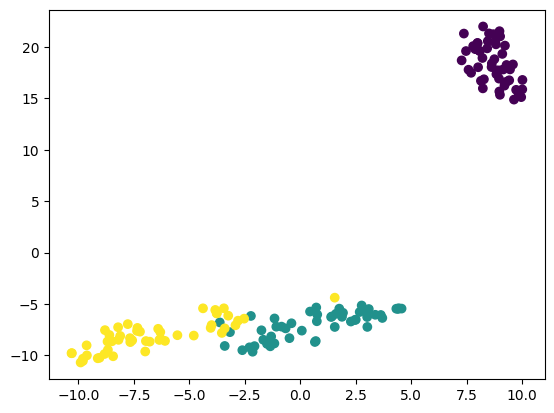

In [41]:
modelT = TSNE(learning_rate=108)
transformed = modelT.fit_transform(iris_df.data)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [44]:
dbscan = DBSCAN()

dbscan.fit(iris_df.data)
pca = PCA(n_components=2).fit(iris_df.data)
pca_2d = pca.transform(iris_df.data)

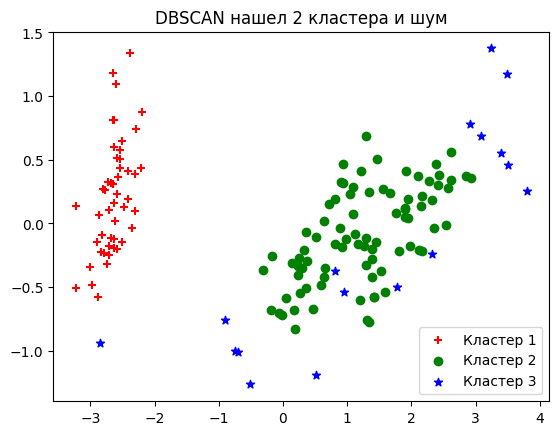

In [45]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Кластер 3', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

      ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0      1  15.26      14.84       0.8710           5.763          3.312   
1      2  14.88      14.57       0.8811           5.554          3.333   
2      3  14.29      14.09       0.9050           5.291          3.337   
3      4  13.84      13.94       0.8955           5.324          3.379   
4      5  16.14      14.99       0.9034           5.658          3.562   
..   ...    ...        ...          ...             ...            ...   
205  206  12.19      13.20       0.8783           5.137          2.981   
206  207  11.23      12.88       0.8511           5.140          2.795   
207  208  13.20      13.66       0.8883           5.236          3.232   
208  209  11.84      13.21       0.8521           5.175          2.836   
209  210  12.30      13.34       0.8684           5.243          2.974   

     asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                   2.221                 5.220    

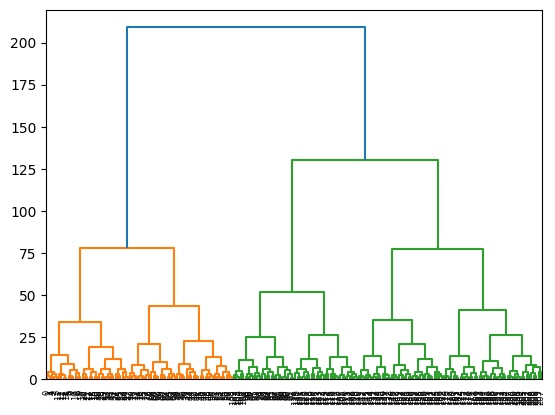

In [48]:
seeds_df = pd.read_csv("seeds.csv")
print(seeds_df)
print(seeds_df.seedType.value_counts())
samples = seeds_df.values
mergings = linkage(samples, method='complete')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6,)
plt.show()

In [49]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
x = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=18).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



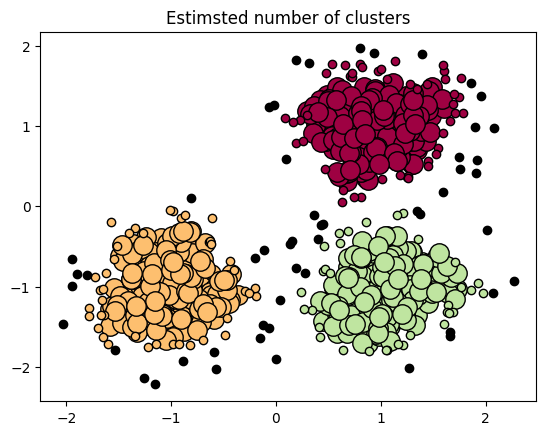

In [53]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
 for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:, 1], 'o', markerfacecolor= tuple(col),
    markeredgecolor='k', markersize='14')
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimsted number of clusters')
plt.show()